<a href="https://colab.research.google.com/github/Darknessdark898/MLF/blob/main/MLFjankyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Darknessdark898/MLF.git


Cloning into 'MLF'...
remote: Enumerating objects: 1770, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 1770 (delta 2), reused 1 (delta 1), pack-reused 1767 (from 2)
Receiving objects: 100% (1770/1770), 48.55 MiB | 27.06 MiB/s, done.
Resolving deltas: 100% (40/40), done.


**DATA LOADING**
In this section we will load data for training and testing and also add labels.

Shape of data in 294.npy: (72, 48)
Data from 294.npy:
[[-39.44183124 -34.35762964 -35.78814925 ... -40.61974515 -32.69219408
  -51.85742459]
 [-32.24644091 -26.44699481 -46.08252982 ... -31.69737218 -36.86830936
  -46.92429515]
 [-43.36680073 -29.46874109 -50.49383928 ... -43.56487439 -31.23188362
  -46.17971449]
 ...
 [-53.8691981  -26.63416208 -14.3121015  ... -35.46343066 -30.28249613
  -43.06475838]
 [-51.24187723 -35.60036987 -46.0655173  ... -39.66907004 -31.80472692
  -54.40121337]
 [-48.10737839 -33.37538472 -37.18759647 ... -41.6837342  -35.76222901
  -37.70645424]]


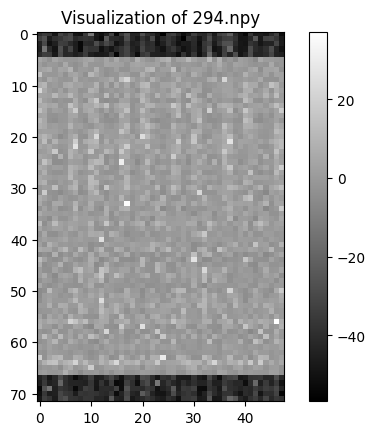

Images shape: (1491, 72, 48)
Labels shape: (1491,)


In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Set the path to your Train folder (Google Colab should have it uploaded)
folder_path = 'MLF/PROJECT/Train'  # Update the path if necessary

# List all .npy files in the folder
npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

# Load and visualize the first .npy file as an example
first_file = npy_files[1000]  # You can change this index to load a different file
data = np.load(os.path.join(folder_path, first_file))

# Check the shape and display the image
print(f"Shape of data in {first_file}: {data.shape}")
print(f"Data from {first_file}:")
print(data)

# Visualize the image
plt.imshow(data, cmap='gray')  # 'gray' is useful for single-channel (grayscale) images
plt.title(f"Visualization of {first_file}")
plt.colorbar()  # Show a colorbar for reference
plt.show()



# Initialize empty lists for images and labels
images = []
labels = []

# Loop through all files to load the data and labels
for file in npy_files:
    # Extract the image ID from the file name (assuming the ID is the number in the file name)
    image_id = int(file.split('.')[0])  # Extracting ID from the filename (e.g., 0.npy -> ID=0)

    # Load the image data
    image = np.load(os.path.join(folder_path, file))

    # Find the corresponding label from the CSV file
    label = labels_df.loc[labels_df['ID'] == image_id, 'target'].values[0]

    # Append the image and label to the lists
    images.append(image)
    labels.append(label)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Check the shape of the data
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Training Data:
Images shape: (1491, 72, 48)
Labels shape: (1491,)

Test Data:
Images shape: (120, 72, 48)
IDs shape: (120,)


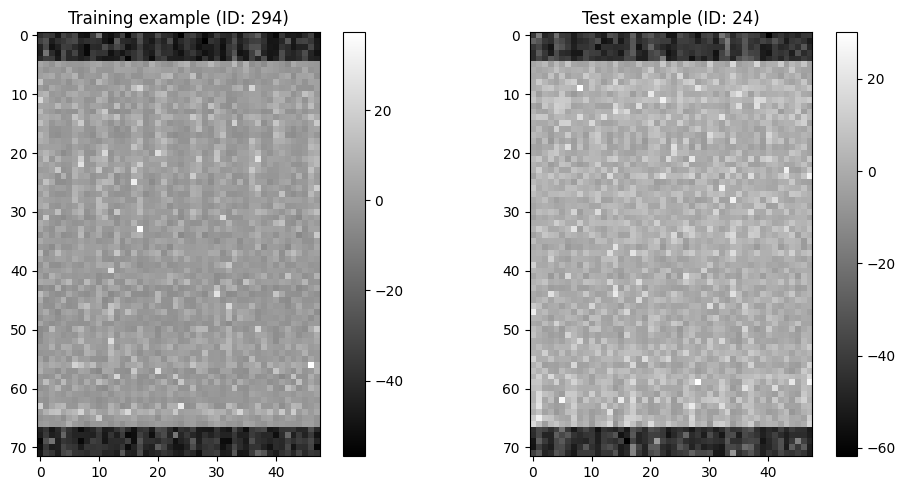

In [24]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# Load the labels CSV file (assuming it's in the same directory)
labels_df = pd.read_csv('MLF/PROJECT/label_train.csv')  # Update path if necessary

# Set the paths to your Train and Test folders
train_folder_path = 'MLF/PROJECT/Train'
test_folder_path = 'MLF/PROJECT/Test'

# List all .npy files in both folders
train_npy_files = [f for f in os.listdir(train_folder_path) if f.endswith('.npy')]
test_npy_files = [f for f in os.listdir(test_folder_path) if f.endswith('.npy')]

# Initialize empty lists for images and labels
train_images = []
train_labels = []
test_images = []
test_ids = []  # For test data, we'll just store the IDs since there are no labels

# Load training data
for file in train_npy_files:
    # Extract the image ID from the file name
    image_id = int(file.split('.')[0])

    # Load the image data
    image = np.load(os.path.join(train_folder_path, file))

    # Find the corresponding label from the CSV file
    label = labels_df.loc[labels_df['ID'] == image_id, 'target'].values[0]

    # Append the image and label to the lists
    train_images.append(image)
    train_labels.append(label)

# Load test data
for file in test_npy_files:
    # Extract the image ID from the file name
    image_id = int(file.split('.')[0])

    # Load the image data
    image = np.load(os.path.join(test_folder_path, file))

    # Append the image and ID to the lists
    test_images.append(image)
    test_ids.append(image_id)

# Convert to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_ids = np.array(test_ids)

# Check the shapes of the data
print("Training Data:")
print(f"Images shape: {train_images.shape}")
print(f"Labels shape: {train_labels.shape}")

print("\nTest Data:")
print(f"Images shape: {test_images.shape}")
print(f"IDs shape: {test_ids.shape}")

# Visualize one example from training and one from test
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(train_images[1000], cmap='gray')
plt.title(f"Training example (ID: {train_npy_files[1000].split('.')[0]})")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(test_images[0], cmap='gray')
plt.title(f"Test example (ID: {test_npy_files[0].split('.')[0]})")
plt.colorbar()

plt.tight_layout()
plt.show()

Training data shapes:
X_train: (1192, 72, 48, 1), y_train: (1192, 3)
X_val: (299, 72, 48, 1), y_val: (299, 3)
Test images: (120, 72, 48, 1)

Sample batch from generator:
Images shape: (32, 72, 48, 1)
Labels shape: (32, 3)


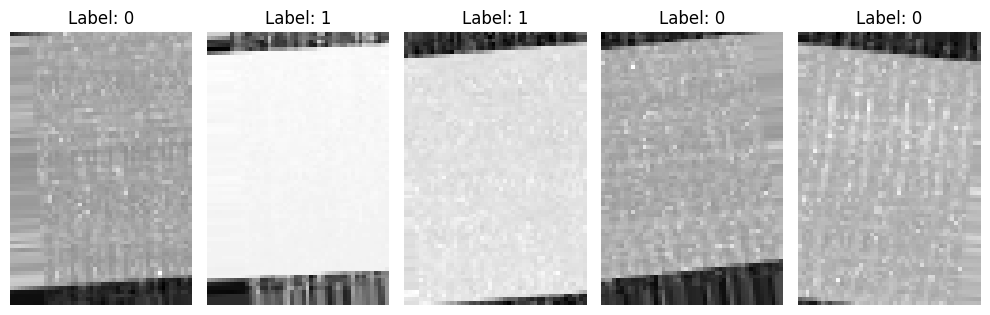

In [26]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the labels CSV file
labels_df = pd.read_csv('MLF/PROJECT/label_train.csv')

# Set the paths to your Train and Test folders
train_folder_path = 'MLF/PROJECT/Train'
test_folder_path = 'MLF/PROJECT/Test'

# List all .npy files in both folders
train_npy_files = [f for f in os.listdir(train_folder_path) if f.endswith('.npy')]
test_npy_files = [f for f in os.listdir(test_folder_path) if f.endswith('.npy')]

# Function to load and preprocess images
def load_and_preprocess_images(file_list, folder_path, is_train=True):
    images = []
    labels_or_ids = []

    for file in file_list:
        # Load image
        image = np.load(os.path.join(folder_path, file))

        # Normalize pixel values to [0, 1]
        image = image.astype('float32') / 255.0

        # If the image is grayscale (2D), add a channel dimension
        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=-1)

        # For training data, get labels
        if is_train:
            image_id = int(file.split('.')[0])
            label = labels_df.loc[labels_df['ID'] == image_id, 'target'].values[0]
            labels_or_ids.append(label)
        # For test data, just get IDs
        else:
            image_id = int(file.split('.')[0])
            labels_or_ids.append(image_id)

        images.append(image)

    return np.array(images), np.array(labels_or_ids)

# Load and preprocess training data
train_images, train_labels = load_and_preprocess_images(train_npy_files, train_folder_path, is_train=True)

# Load and preprocess test data
test_images, test_ids = load_and_preprocess_images(test_npy_files, test_folder_path, is_train=False)

# Encode labels to integers if they're categorical (strings)
if isinstance(train_labels[0], str):
    label_encoder = LabelEncoder()
    train_labels = label_encoder.fit_transform(train_labels)

# Convert labels to one-hot encoding
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes=num_classes)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

# Print shapes to verify everything looks correct
print("Training data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test images: {test_images.shape}")

# Data augmentation configuration (for when you create the model)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# The validation data should not be augmented!
val_datagen = ImageDataGenerator()

# Create generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Example of how to inspect one batch
sample_images, sample_labels = next(train_generator)
print("\nSample batch from generator:")
print(f"Images shape: {sample_images.shape}")
print(f"Labels shape: {sample_labels.shape}")

# Visualize some augmented images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {np.argmax(sample_labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.7254 - loss: 0.7141 - val_accuracy: 0.8125 - val_loss: 0.4500
Epoch 2/10
 1/37 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.7812 - loss: 0.5468

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7812 - loss: 0.5468 - val_accuracy: 0.8090 - val_loss: 0.4374
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.8304 - loss: 0.4865 - val_accuracy: 0.8750 - val_loss: 0.5889
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9062 - loss: 0.2474 - val_accuracy: 0.8750 - val_loss: 0.5568
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.9038 - loss: 0.3086 - val_accuracy: 0.8889 - val_loss: 0.6163
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8438 - loss: 0.5704 - val_accuracy: 0.9028 - val_loss: 0.4654
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9001 - loss: 0.2712 - val_accuracy: 0.9062 - val_loss: 0.5528
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.1456 - val_accuracy: 0.8993 - val_loss: 0.5699
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.9193 - loss: 0.2192 - val_accuracy: 0.8993 - val_los

In [29]:
import pandas as pd
import numpy as np

# Assuming you have:
# 1. Your trained model (from previous steps)
# 2. Preprocessed test_images (from previous steps)
# 3. test_ids (from previous steps)

# Generate predictions on test data
test_predictions = model.predict(test_images)

# If it's a classification task with multiple classes, get the class with highest probability
predicted_classes = np.argmax(test_predictions, axis=1)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'ID': test_ids,
    'target': predicted_classes
})

# Ensure all test IDs are included (in case some were filtered during preprocessing)
# This matches the format in test_format.csv
all_ids = pd.read_csv('MLF/PROJECT/test_format.csv')['ID']  # Read the template
submission_df = pd.merge(all_ids, submission_df, on='ID', how='left')

# Fill any missing predictions (if any) with 0 or your preferred default
submission_df['target'] = submission_df['target'].fillna(0).astype(int)

# Verify the format matches the example
print("Submission DataFrame head:")
print(submission_df.head())
print("\nSubmission DataFrame tail:")
print(submission_df.tail())

# Save to CSV
submission_df.to_csv('my_submission.csv', index=False)
print("\nSubmission file saved as 'my_submission.csv'")

# If you want to evaluate against a validation set (not test set)
# Assuming you have X_val and y_val from earlier
val_predictions = model.predict(X_val)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(y_val, axis=1)

# Calculate metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nValidation Set Evaluation:")
print(f"Accuracy: {accuracy_score(val_true_classes, val_pred_classes):.4f}")
print("\nClassification Report:")
print(classification_report(val_true_classes, val_pred_classes))
print("\nConfusion Matrix:")
print(confusion_matrix(val_true_classes, val_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Submission DataFrame head:
   ID  target
0   0       1
1   1       0
2   2       1
3   3       0
4   4       0

Submission DataFrame tail:
      ID  target
115  115       1
116  116       0
117  117       0
118  118       0
119  119       1

Submission file saved as 'my_submission.csv'
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step

Validation Set Evaluation:
Accuracy: 0.8997

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       243
           1       1.00      0.93      0.96        28
           2       0.00      0.00      0.00        28

    accuracy                           0.90       299
   macro avg       0.63      0.64      0.63       299
weighted avg       0.82      0.90      0.86       299


Confusion Matrix:
[[243   0   0]
 [  2  26   0]
 [ 28   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
